# Sampling and Quantization of Images

## Sampling:
### Description:
Sampling is the process of converting a continuous-space signal into a discrete-space signal. In image processing, we have to convert analog images into digital ones to display them on electronic devices. This process also makes it easier and more flexible to perform operations on images as we can decrease the number of pixels as we please. An image may be continuous on x- and y- coordinates. To convert it to digital form, we have to apply sampling in both coordinates. If we have a colored image, we have to perform sampling on all channels as well. 
### Algorithm:
First we select a sampling ratio which also determines the resolution of the resulting image. The higher the ratio, the less resolution the image will have. This sampling ratio becomes the height and width of a square that we trace along the image. We start from top left and take the average value of the pixels covered by this square and register this value as the resulting image's first pixel value. Then move the square to the right by sampling ratio, take the average value of the pixels covered by the square again. This is done until we reach the end of the row. Then we move to square down by the sampling ratio and do the same process for this row as well. We repeat this until we reach the bottom of the image. This process is done for all three channels if we are dealing with a colored image. The resulting image's height and width can be found by dividing the height and the width of the original image by the sampling ratio.

In [1]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

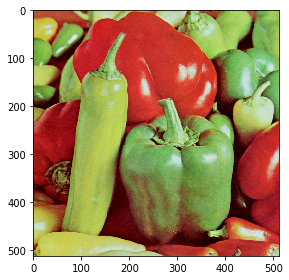

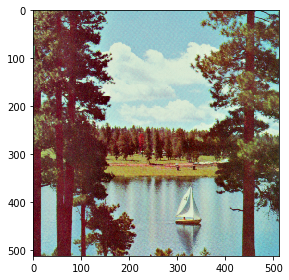

In [2]:
#Loading original image [1], [2]
peppers = skimage.io.imread('4.2.07.tiff')
boat = skimage.io.imread('4.2.06.tiff')
skimage.io.imshow(peppers)
plt.show()
skimage.io.imshow(boat)


In [3]:
print(peppers.shape)
print(type(peppers))
print(boat.shape)
print(type(boat))

(512, 512, 3)
<class 'numpy.ndarray'>
(512, 512, 3)
<class 'numpy.ndarray'>


### Sampling function:
This function creates an all-zero-array, then it goes through the image by sampling ratio increments and calculates the average values of the encompassed pixels and saves them to the created array. Finally returns this array as the sampled image.

In [4]:
def sample(image, sampling_ratio):
 
    image_sampled = np.zeros((int(image.shape[0]/sampling_ratio), int(image.shape[1]/sampling_ratio), image.shape[2]), dtype='float32')
    for i in range(image_sampled.shape[0]):
        for j in range(image_sampled.shape[1]):
            for k in range(image_sampled.shape[2]):
                sample = image[i*sampling_ratio:(i+1)*sampling_ratio, j*sampling_ratio:(j+1)*sampling_ratio, k]
                image_sampled[i,j,k] = np.mean(sample)
    

    return image_sampled.astype('uint8')

### Results with Different Sampling Ratios:

Text(0.5, 1.0, 'Image Sampled with Ratio=100')

<Figure size 432x288 with 0 Axes>

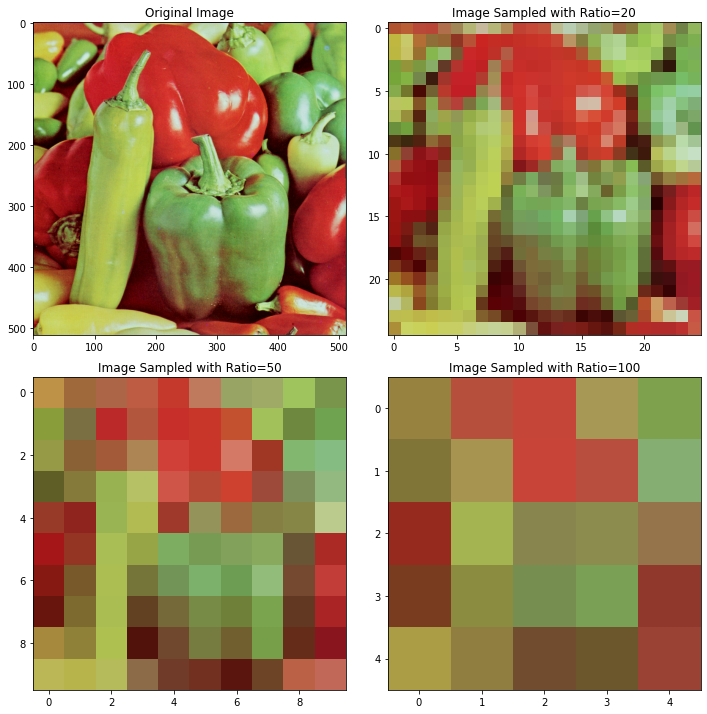

In [5]:
#Drawing the original and the sampled images with ratios of 20, 50 and 100
plt.figure()
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,10))
ax = ax.ravel()
fig.tight_layout()
#Plot the original image
ax[0].imshow(peppers)
ax[0].set_title('Original Image')
#Plot the image sampled with ratio 20
ax[1].imshow(sample(peppers, 20))
ax[1].set_title('Image Sampled with Ratio=20')
#Plot the image sampled with ratio 50
ax[2].imshow(sample(peppers, 50))
ax[2].set_title('Image Sampled with Ratio=50')
#Plot the image sampled with ratio 100
ax[3].imshow(sample(peppers, 100))
ax[3].set_title('Image Sampled with Ratio=100')

Text(0.5, 1.0, 'Image Sampled with Ratio=100')

<Figure size 432x288 with 0 Axes>

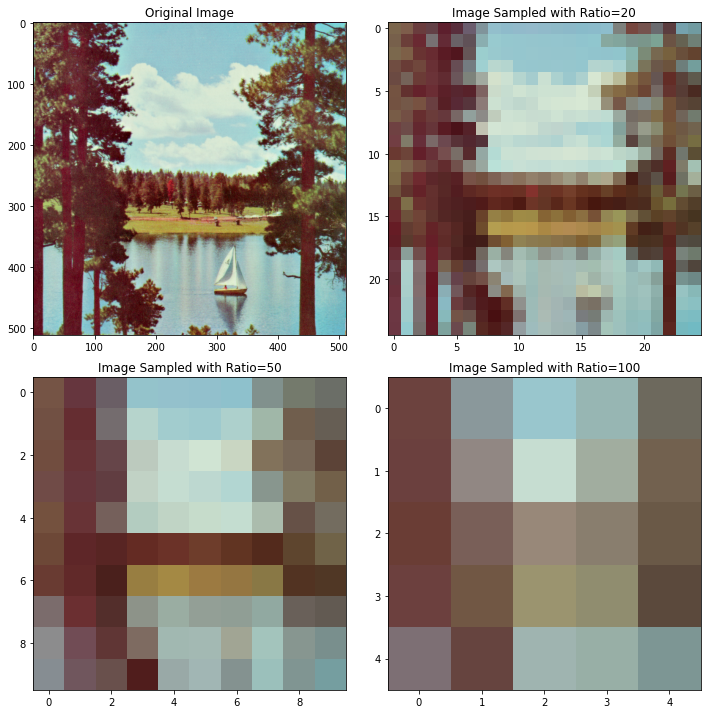

In [6]:
#Drawing the original and the sampled images with ratios of 20, 50 and 100
plt.figure()
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,10))
ax = ax.ravel()
fig.tight_layout()
#Plot the original image
ax[0].imshow(boat)
ax[0].set_title('Original Image')
#Plot the image sampled with ratio 20
ax[1].imshow(sample(boat, 20))
ax[1].set_title('Image Sampled with Ratio=20')
#Plot the image sampled with ratio 50
ax[2].imshow(sample(boat, 50))
ax[2].set_title('Image Sampled with Ratio=50')
#Plot the image sampled with ratio 100
ax[3].imshow(sample(boat, 100))
ax[3].set_title('Image Sampled with Ratio=100')

### Analysis:
As we pointed out before, as the sampling ratio gets bigger, we have less resolution meaning we obtain lower image quality. This is expected as the squares gets bigger, the average value of the encompassed pixels becomes less representative of those pixels meaning individual pixels will have less influence. This can be likened to voting surveys; the more people is interviewed, the more predictive the results become, because we sample more from the population. The smaller the sampling square the more samples we draw from the image, giving better results.

## Quantization:
### Description: 
Just like images may be continuous functions in space, they may be continuous in amplitude as well. To digitize an image in space we apply sampling, to digitize an image in amplitude we apply quantization. Unlike sampling, the number of pixels stays the same in the resulting image but each pixel value is replaced with a base value determined by the quantization ratio. This can be likened to how histograms work. In histograms pixels are placed into bins based on their intensity values. Hereafter, those pixels can be represented by the bin edges (lower or upper). In a similar manner, quantization puts continuous signals into bins that have certain ranges to achieve digitization. All the values falling into a bin is represented by that bin's lower edge.
### Algorithm:
Go through all pixels of an image, from left to right, top to bottom, across all channels, multiply each pixel by a pre-determined quantization ratio. Round this number down to the nearest integer and multiply the result by the quantization ratio. Save this number as the pixel value of the corresponding pixel in the resulting image.

### Quantizing Function:
This function creates an all zeros array with the same shape as the original image. Then, it goes through each pixel and multiplies the pixel value by a pre-determined quantization ratio, finds the floor of that number and multiplies it with the quantization ratio. Finally it returns the resulting image as an array.

In [7]:
def quantize(image, quant_ratio):
    
    quant_image = np.zeros((image.shape[0], image.shape[1], image.shape[2]), dtype='float32')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                quant_image[i][j][k] = int(image[i][j][k]/quant_ratio)*quant_ratio
    return quant_image.astype('uint8')


### Results with Different Quantization Ratios:

Text(0.5, 1.0, 'Quantized Image with Ratio=200')

<Figure size 432x288 with 0 Axes>

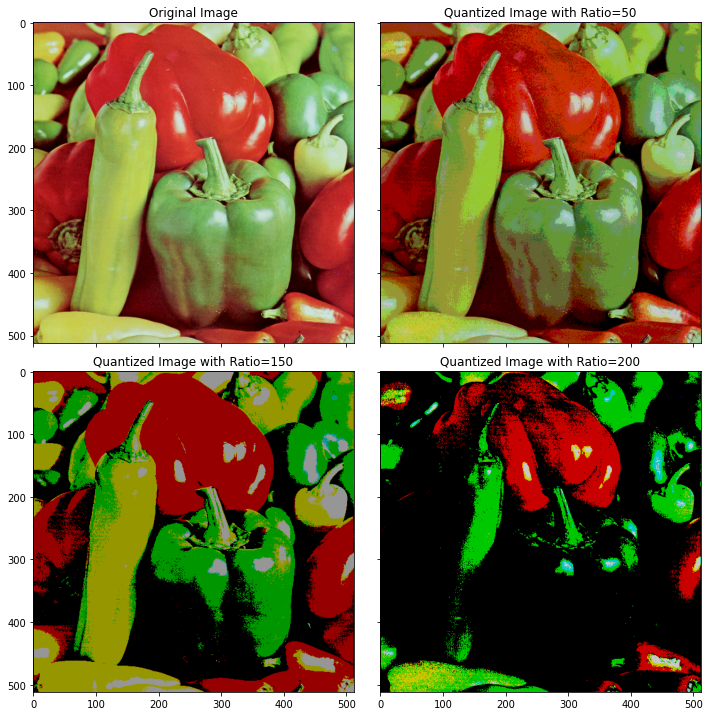

In [8]:
plt.figure()
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,10), sharex=True, sharey=True)
ax = ax.ravel()
fig.tight_layout()
#Plot the original image
ax[0].imshow(peppers)
ax[0].set_title('Original Image')
#Plot the quantized with ratio 50
ax[1].imshow(quantize(peppers, 50))
ax[1].set_title('Quantized Image with Ratio=50')
#Plot the quantized with ratio 150
ax[2].imshow(quantize(peppers, 150))
ax[2].set_title('Quantized Image with Ratio=150')
#Plot the quantized with ratio 200
ax[3].imshow(quantize(peppers, 200))
ax[3].set_title('Quantized Image with Ratio=200')


Text(0.5, 1.0, 'Quantized Image with Ratio=200')

<Figure size 432x288 with 0 Axes>

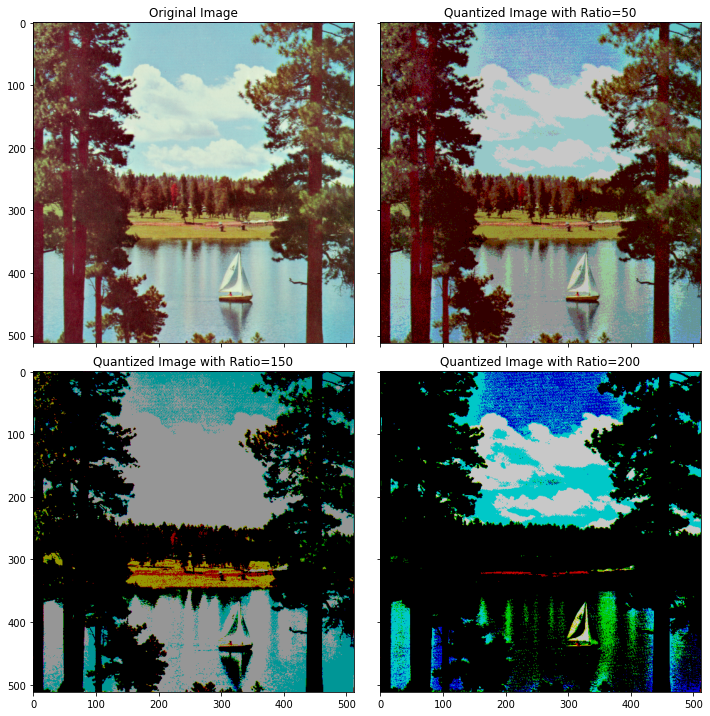

In [9]:
plt.figure()
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,10), sharex=True, sharey=True)
ax = ax.ravel()
fig.tight_layout()
#Plot the original image
ax[0].imshow(boat)
ax[0].set_title('Original Image')
#Plot the quantized with ratio 50
ax[1].imshow(quantize(boat, 50))
ax[1].set_title('Quantized Image with Ratio=50')
#Plot the quantized with ratio 150
ax[2].imshow(quantize(boat, 150))
ax[2].set_title('Quantized Image with Ratio=150')
#Plot the quantized with ratio 200
ax[3].imshow(quantize(boat, 200))
ax[3].set_title('Quantized Image with Ratio=200')


### Analysis:
Let's explain how quantization works with an example. If a certain pixel has a value of 110 and quantization ratio is 20. 110/20=5.5. This number is rounded down to 5. 5 is multiplied by 20 and the result becomes 100. All pixel values of 110 are descreased to 100. Those pixels with value of 110 are expected to appear slightly darker since we decrease the pixel values. If we increase the quantization ratio to 70, 110/70=1.5 which is rounded down to 1. 1x70=70. In this case, all pixels with value of 110 will appear a lot darker than the previous case. As we increase the quantization ratio; for more and more pixels,the division of the pixel value by the quantization ratio will result in zero. In the example, if the quantization ratio is chosen as 200, the division becomes 110/200=0.55 which is rounded down to 0. All pixels with value of 110 or less will appear black with this very high quantization ratio. Actually, any pixel with a value of 199 or less will be turned to black. So, from our observations of the resulting images and from the calculations, we can say that quantization limits the variance in intensity and turnes images darker and less smooth.

Reference:
[1]: https://sipi.usc.edu/database/database.php?volume=misc&image=13#top
[2]: https://sipi.usc.edu/database/database.php?volume=misc&image=12#top